# Wormcat "Category One" review

In [1]:
# Load the Wormbase Annotation List
import pandas as pd

wormcat_df = pd.read_csv('./wormbase_data/whole_genome_v2_nov-11-2021.csv') 
wormcat_df = wormcat_df.rename(columns={'Sequence ID':'wc_sequence_id','Wormbase ID':'wormbase_id','Category 1':'category_1','Category 2':'category_2','Category 3':'category_3'})
wormcat_df = wormcat_df.drop(columns=['Automated Description'])
print(f"{len(wormcat_df):,}")
wormcat_df.head()

31,389


,wc_sequence_id,wormbase_id,category_1,category_2,category_3
0,F15H10.3,WBGene00000144,Cell cycle,Cell cycle: APC,Cell cycle: APC
1,F35G12.9,WBGene00000145,Cell cycle,Cell cycle: APC,Cell cycle: APC
2,C09H10.7,WBGene00007501,Cell cycle,Cell cycle: APC,Cell cycle: APC
3,K06H7.6,WBGene00000143,Cell cycle,Cell cycle: APC,Cell cycle: APC
4,B0511.9,WBGene00015235,Cell cycle,Cell cycle: APC,Cell cycle: APC


In [2]:
# Create three category sets category_core_names, category_pag_names, category_not_covered_names
# PAG is Poorly Annotated Genes

category_pag_names=["Transcription: unassigned", "Transmembrane protein", "Transmembrane transport", "Unassigned"]
category_not_covered_names=["Non-coding RNA", "Pseudogene"]

# Given all category names return a list of names removing the names from category_pag_names and category_not_covered_names
category_all_names = wormcat_df['category_1'].unique().tolist()
category_core_names = [category for category in category_all_names if category not in category_pag_names+category_not_covered_names]

#Expect that we should have 28 categories in core as of nov-11-2021
assert len(category_core_names) == 28

In [3]:
# Create a dictionary of category dataframes
category_dfs = {}
for category in category_all_names:
    df = wormcat_df.query(f"category_1 == '{category}'")
    category_dfs[category]=df

In [8]:
# How many wormbase ids for each category?
def df_summary(dict_of_dfs, dict_keys):
    total=0
    count=0
    summary_dict = {}
    for key in sorted(dict_keys):
        length = len(dict_of_dfs[key])
        print(f"{key:<35} {length:>8,}")
        total += length
        count += 1
        summary_dict[key]=length

    print("="*45)
    print(f"Count:{count:>4} {total:>33,}")
    return summary_dict
    
summary_dict = df_summary(category_dfs, category_core_names+category_pag_names)

Cell cycle                               172
Chaperone                                 92
Cilia                                     60
Cytoskeleton                             371
DNA                                      176
Development                              295
Extracellular material                   495
Globin                                    36
Lysosome                                  91
Major sperm protein                       31
Metabolism                             1,601
Muscle function                           62
Neuronal function                        308
Nuclear pore                              36
Nucleic acid                             231
Peroxisome                                15
Protein modification                     271
Proteolysis general                      394
Proteolysis proteasome                   733
Ribosome                                 244
Signaling                              1,188
Stress response                          833
Traffickin

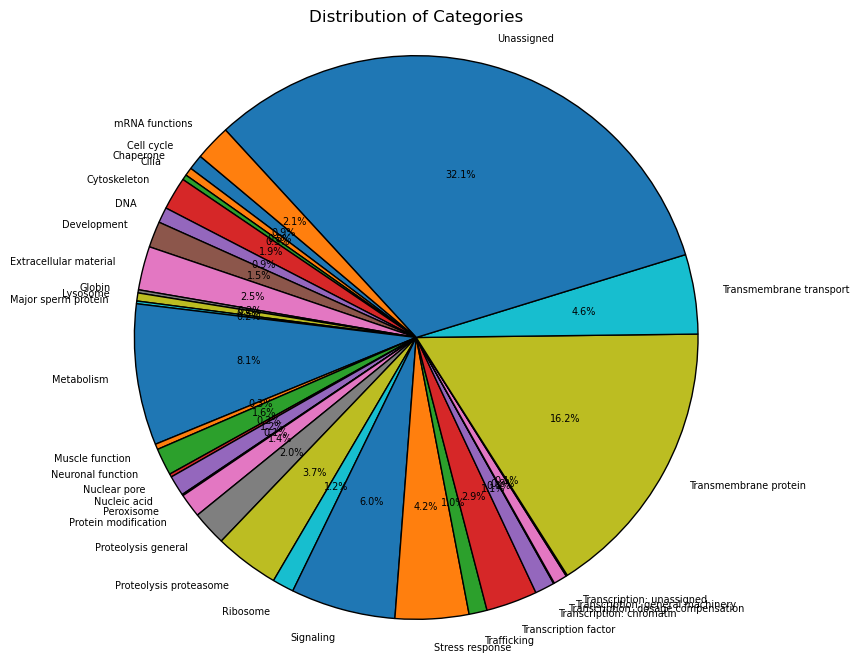

In [9]:
import matplotlib.pyplot as plt

summary_dict
labels = summary_dict.keys()
sizes = summary_dict.values()



# Creating a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'},textprops={'fontsize': 7})

# Equal aspect ratio ensures that pie chart is drawn as a circle.
plt.axis('equal')

# Display the pie chart
plt.title('Distribution of Categories')
plt.show()


# Appendix

In [11]:
# Function to monitor memory usage
import psutil
def print_memory_usage():
    cpu_percent=psutil.cpu_percent()
    memory_percent=psutil.virtual_memory().percent
    memory_available=psutil.virtual_memory().available / (1024 ** 3)
    print(f"CPU {cpu_percent}% Memory {memory_percent}% Mem Avail {memory_available:,.2f} GB")
print_memory_usage()

CPU 16.7% Memory 52.2% Mem Avail 30.62 GB


In [12]:
%%capture notebook_variables
%whos
# What Vaiables are in use

In [13]:
# Utility function to show what variables have been defined in this notebook

def sorted_whos(notebook_variables):
    pos=0
    line=""
    lines=[]
    for item in notebook_variables.stdout:
        if item=='\n':
            lines.append(line)
            line = ""
        else:
            line +=item

    records=[]
    for line in lines:
        variable =line[0:29].strip()
        type_nm  =line[29:42].strip()
        data_into=line[42:].strip()
        records.append((variable,type_nm,data_into))

    popped_records = [records.pop(0) for _ in range(2)]
    sorted_records = sorted(records, key=lambda x: x[1])
    sorted_records = popped_records + sorted_records
    for record in sorted_records:
        print(f"{record[0]:<29}{record[1]:<12}{record[2]}")
        
sorted_whos(notebook_variables)

Variable                     Type        Data/Info
-----------------------------------------------------
df                           DataFrame   wc_sequence_id     <...>\n[6343 rows x 5 columns]
wormcat_df                   DataFrame   wc_sequence_id     <...>n[31389 rows x 5 columns]
category_dfs                 dict        n=34
summary_dict                 dict        n=32
labels                       dict_keys   dict_keys(['Cell cycle', <...>gned', 'mRNA functions'])
sizes                        dict_values dict_values([172, 92, 60,<...>5, 3200, 901, 6343, 407])
df_summary                   function    <function df_summary at 0x1624d09d0>
print_memory_usage           function    <function print_memory_usage at 0x163a209d0>
category_all_names           list        n=34
category_core_names          list        n=28
category_not_covered_names   list        n=2
category_pag_names           list        n=4
pd                           module      <module 'pandas' from '/U<...>ages/panda